In [12]:
%matplotlib inline
import numpy as np
import matplotlib as mpl
import scipy.fftpack as scfft

import matplotlib.pylab as plt
import seaborn as sns
sns.set_style("white")
sns.set_context("notebook")
#
from ISRSpectrum.ISRSpectrum import ISRSpectrum
from isrutilities.physConstants import v_C_0

def plot1dspec(Ti,Te):
    mpl.rcParams['text.usetex'] = True
    mpl.rcParams['text.latex.preamble'] = [r'\usepackage{amsmath}'] #for \text command
    databloc = np.array([[1e11,Ti],[1e11,Te]])
    nspec=256
    spfreq=50e3
    ISpec_ion = ISRSpectrum(centerFrequency = 449e6, nspec=nspec, sampfreq=spfreq,dFlag=True)
    species=['O+','e-']
#    databloc = np.array([[1.66e10,863.],[1.66e10,863.]])
    ylim=[0,1.4]
    ylim2=[-.5,1.4]
    flims=np.array([3.03e6,3.034e6])
    
    
    fion,ionline= ISpec_ion.getspecsep(databloc,species)
    
    acf=scfft.ifft(scfft.ifftshift(ionline)).real
    tau=scfft.ifftshift(np.arange(-np.ceil((float(nspec)-1)/2),np.floor((float(nspec)-1)/2)+1))/spfreq
    
    
    
    
    fig,ax = plt.subplots(1,2,sharey=False, figsize=(6,4),facecolor='w')
    
    l1=ax[0].plot(fion*1e-3,ionline/ionline.max(),'-',lw=3)[0]
    sns.despine()

    ax[0].set_xlim([-15,15])
    ax[0].spines['right'].set_visible(False)

    ax[0].set_xlabel('Frequency (kHz)',fontsize=14)
    ax[0].set_title(r'$\langle|n_e(|\mathbf{k}|=18.5\;\mathrm{ rad/m},\omega)|^2\rangle$',fontsize=18)
    ax[0].set_ylabel(r'Normalized Magnitude',fontsize=14)
    
    ax[0].set_ylim(ylim)
    
    
    
    l1=ax[1].plot(tau[:64]*1e6,acf[:64]/acf[0],'-',lw=3)[0]
    sns.despine()

    ax[1].set_xlim([0,280])
    ax[1].spines['right'].set_visible(False)

    ax[1].set_xlabel(r'$\tau$ in $\mu$s ',fontsize=14)
    ax[1].set_title(r'$\langle|n_e(|\mathbf{k}|=18.5\;\mathrm{ rad/m},\tau)|^2\rangle$',fontsize=18)
    ax[1].set_ylabel(r'Normalized Magnitude',fontsize=14)
    plt.tight_layout()
    ax[1].set_ylim(ylim2)
def plot2dspec(Ti):
    databloc = np.array([[1e11,Ti],[1e11,2.5e3]])
    species=['O+','e-']
    newcentfreq=    449e6 +np.linspace(-200,550,250)*1e6
    k_all= 2*2*np.pi*newcentfreq/v_C_0
    k_lims=np.array([k_all.min(),k_all.max()])
    freq_lims=np.array([newcentfreq.min(),newcentfreq.max()])
    oution = []
    for i,if_0 in enumerate(newcentfreq):
        ISpec_ion = ISRSpectrum(centerFrequency = if_0, nspec=256, sampfreq=50e3,dFlag=False)
        fion,ionline= ISpec_ion.getspecsep(databloc,species)
        oution.append(ionline)
    oution=np.array(oution)
    
    
    F,K_b=np.meshgrid(fion,k_all)
    
    fig,ax = plt.subplots(1,1,sharey=True, figsize=(4,4),facecolor='w')
    
    l1=ax.pcolor(F*1e-3,K_b,oution/oution.max(),cmap='viridis')

    cb1 = plt.colorbar(l1, ax=ax)
    ax.set_xlim([-25,25])
    ax.set_ylim(k_lims)
    ax.set_xlabel('Frequency (kHz)',fontsize=14)
    ax.set_title(r'$\langle|n_e(\mathbf{k},\omega)|^2\rangle$',fontsize=18)
    ax.set_ylabel(r'$|\mathbf{k}|$ (rad/m)',fontsize=14)
    plt.tight_layout()

Calculating Gordeyev int for electons
	 No collisions No magnetic field
Calculating Gordeyev int for ion species #0
	 No collisions No magnetic field


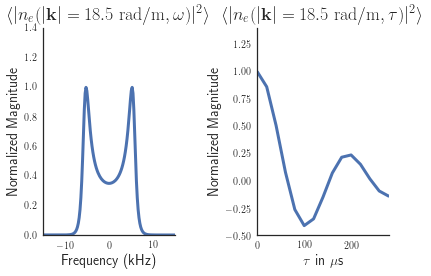

In [13]:
from ipywidgets import interactive,FloatSlider
from IPython.display import display
slideTi = FloatSlider(
    value=1000.,
    min=500.,
    max=5000.,
    step=500.,
    description='Ti:',
    disabled=False,
    continuous_update=False,
    orientation='horizontal',
    readout=True,
    readout_format='.1f',
    slider_color='white'
)
slideTe = FloatSlider(
    value=1000.,
    min=500.,
    max=5000.,
    step=500.,
    description='Te:',
    disabled=False,
    continuous_update=False,
    orientation='horizontal',
    readout=True,
    readout_format='.1f',
    slider_color='white'
)
w=interactive(plot1dspec,Ti=slideTi,Te=slideTe)
display(w)

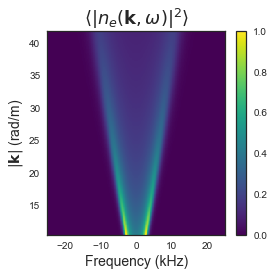

In [10]:

slide1 = FloatSlider(
    value=1000.,
    min=500.,
    max=5000.,
    step=500.,
    description='Ti:',
    disabled=False,
    continuous_update=False,
    orientation='horizontal',
    readout=True,
    readout_format='.1f',
    slider_color='white'
)
w=interactive(plot2dspec,Ti=slide1)
display(w)

In [7]:
from ipywidgets import interact, FloatSlider, RadioWidget

StaticInteract(plot2dspec,
               Ti=RangeWidget(500, 5000,500 ))

ImportError: cannot import name RadioWidget